# <span style = "color:green"> Text-Based Emotion Detection</span>

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv('Emotion_final.csv')

In [3]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
for i in range(10):
    print(df['Text'][i])

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
im grabbing a minute to post i feel greedy wrong
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
i am feeling grouchy
ive been feeling a little burdened lately wasnt sure why that was
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i feel as confused about life as a teenager or as jaded as a year old man
i have been with petronas for years i feel that petronas has performed well and made a huge profit
i feel romantic too


In [5]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [7]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [8]:
df.duplicated().sum()

3

In [9]:
df.drop_duplicates(keep = 'first',inplace = True)

In [10]:
df.duplicated().sum()

0

In [14]:
happy = df[df['Emotion'] == 'happy']

for text in happy['Text'][:5]:
    print(text)


i have been with petronas for years i feel that petronas has performed well and made a huge profit
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious
i do not feel reassured anxiety is on each side
i have the feeling she was amused and delighted


In [15]:
sad = df[df['Emotion'] == 'sadness']
for text in sad['Text'][:10]:
    print(text)

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
ive been feeling a little burdened lately wasnt sure why that was
i feel like i have to make the suffering i m seeing mean something
i feel low energy i m just thirsty
i didnt really feel that embarrassed
i feel pretty pathetic most of the time
i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties
i still love my so and wish the best for him i can no longer tolerate the effect that bm has on our lives and the fact that is has turned my so into a bitter angry person who is not always particularly kind to the people around him when he is feeling stressed
i feel so inhibited in someone elses kitchen like im painting on someone elses picture


In [16]:
suprise = df[df['Emotion'] == 'surprise']
for text in suprise['Text'][:10]:
    print(text)

ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i have seen heard and read over the past couple of days i am left feeling impressed by more than a few companies
i keep feeling pleasantly surprised at his supportiveness and also his ease in new situations
i am now nearly finished the week detox and i feel amazing
i too feel as if i am a stranger in a strange land and i am raising my son in a place that is not his father s ancestral home
i started feeling funny and then friday i woke up sick as a dog
im certainly not going to sit and tell you whats going on in my personal life but i feel that if you were ever curious about whats going in my life all youd have to do is watch the show
im sorry that there wasnt more humor in this post but im not feeling all that funny
i want to hold this feeling of shocked awe and wonder forever
i will enclose her verses on her could not weigh much more thinking and feeling curious t

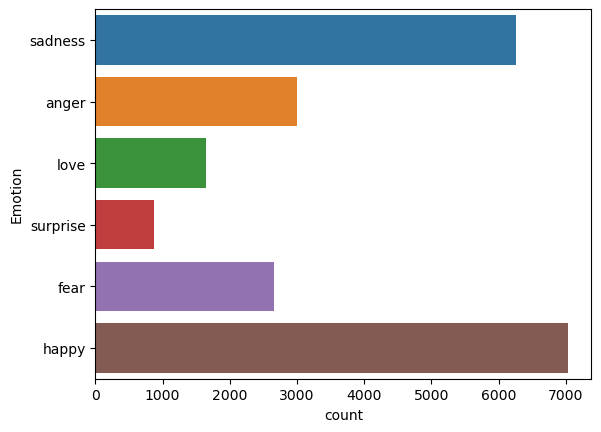

In [18]:
sns.countplot(y = df['Emotion'])
plt.show()

In [19]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
df['Emotion'] = le.fit_transform(df['Emotion'])

In [23]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


In [24]:
x = list(le.classes_)

In [25]:
x

['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

### Import WordNetLemmatizer, stopwords

In [26]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [27]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]",' ',sentence).split()
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v')for word in words]
    word = ' '.join(word)
    return word

In [28]:
df['Text'] = df['Text'].apply(preprocess)

In [29]:
for i in range(10):
    print(df['Text'][i])
    print()

didnt feel humiliate

go feel hopeless damn hopeful around someone care awake

im grab minute post feel greedy wrong

ever feel nostalgic fireplace know still property

feel grouchy

ive feel little burden lately wasnt sure

ive take milligrams time recommend amount ive fall asleep lot faster also feel like funny

feel confuse life teenager jade year old man

petronas years feel petronas perform well make huge profit

feel romantic



In [30]:
X = df['Text']
y = df['Emotion']

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tf = TfidfVectorizer()

In [33]:
X = tf.fit_transform(X)

In [34]:
X.shape

(21456, 15553)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Create a Random forest classifier model

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier(n_estimators=50)

### Train the model

In [39]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [40]:
model.score(X_train,y_train)

0.9977278023770683

In [ ]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
accuracy_score(y_test,y_pred)

0.8657968313140727

<Axes: >

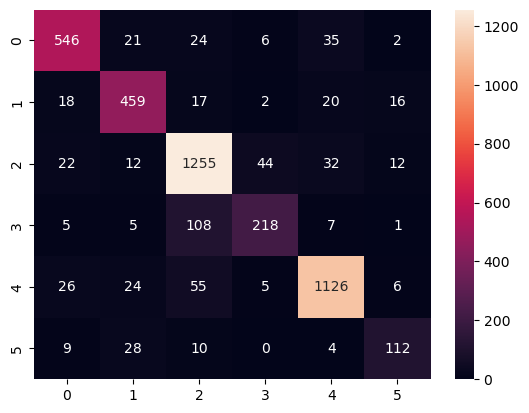

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       634
           1       0.84      0.86      0.85       532
           2       0.85      0.91      0.88      1377
           3       0.79      0.63      0.70       344
           4       0.92      0.91      0.91      1242
           5       0.75      0.69      0.72       163

    accuracy                           0.87      4292
   macro avg       0.84      0.81      0.82      4292
weighted avg       0.86      0.87      0.86      4292



***